# Projeto Final - Análise e Visualização de Dados

Grupo: Ruy Ovidio, Rogerio Fernandes, Fabio Cardoso, Allan Bispo

### Step 1. Importar as bibliotecas necessárias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Step 2. Importar os dados deste [endereço](http://dados.recife.pe.gov.br/dataset/61545107-2e7d-4506-b9fa-f5264a7f6ec9/resource/d153f88e-3c25-422b-8b94-ef8d660bf7bf/download/acidentes-2016.csv)

### Step 3. Atribua o csv a variável acidentes

In [ ]:
link = "http://dados.recife.pe.gov.br/dataset/61545107-2e7d-4506-b9fa-f5264a7f6ec9/resource/d153f88e-3c25-422b-8b94-ef8d660bf7bf/download/acidentes-2016.csv"
df_acidentes = pd.read_csv(link, sep=";")
df_acidentes.head()

,longitude,latitude,data de abertura,hora de abertura,bairro,endereco,complemento,tipo de ocorrencia,quantidade de vitimas,descricao,tipo
0,-34.905705,-8.037728,01/01/2016,18:30,JAQUEIRA,AV RUI BARBOSA,EM FRENTE AO PARQUE DA JAQUEIRA,COLISÃO,1,COLISÃO ENTRE QUATRO AUTO; SEGUINTE DE UM CAPO...,Automóveis
1,-34.938068,-8.131177,04/01/2016,16:05,JORDÃO,RUADRALVAROFERRAZ,TERMINALDOÔNIBUSDEJORDÃOBAIXO,COLISÃO,1,2AUTOS,Automóveis
2,-34.915617,-7.993612,06/01/2016,17:33,DOISUNIDOS,RUAVINTEEUMDEJUNHO343,PRÓXIMOAASSEMBLÉIADEDEUSEANTENADAOI,CHOQUE,1,CHOQUEDEVEÍCULOCOMMURO,Automóveis
3,-34.896884,-8.118186,07/01/2016,10:29,BOAVIAGEM,AVENGENHEIRODOMINGOSFERREIRA3333,EMFRENTEAGALERIASANTAROSA,COLISÃO,1,COLISÃOCOMVITIMA;ONIBUSEAUTO-PASSEIO,Automóveis
4,-34.910203,-8.098421,07/01/2016,13:53,IMBIRIBEIRA,AVMARECHALMASCARENHASDEMORAES,EMBAIXODOSEMAFORO288,COLISÃO,1,COLISAODEMOTOEDOISAUTOS/V,Automóveis


### Step 4. Extraia a proporção dos acidentes em relação ao tipo de ocorrência

In [ ]:
proporcao_acidentes = df_acidentes['tipo de ocorrencia'].value_counts(normalize=True)*100
proporcao_acidentes

COLISÃO                   79.119086
ATROPELAMENTO             11.990212
COLISÃO COM CICLISTA       3.425775
CHOQUE                     2.773246
COLISÃOa                   0.652529
CAPOTAMENTO                0.407830
ENTRADA E SAÍDA            0.326264
ENGAVETAMENTO              0.326264
TOMBAMENTO                 0.326264
ACID. DE PERCURSO          0.163132
COLISÃO\t2016 13 050\t     0.163132
ATROPELAMENTO ANIMAL       0.081566
QUEDA DE ÁRVORE            0.081566
ATROPELAMENTOa             0.081566
FISCALIZAÇÃO               0.081566
Name: tipo de ocorrencia, dtype: float64

### Step 5. Observe que há tipo de ocorrências que estão escritas erradas. Utilize str.replace() para agrupar os valores do mesmo tipo que podem estar com erro na escrita. No fim, serão 12 tipos de ocorrências.

In [ ]:
df_acidentes['tipo de ocorrencia'] = df_acidentes['tipo de ocorrencia'].str.replace('ATROPELAMENTOa','ATROPELAMENTO')
df_acidentes['tipo de ocorrencia'] = df_acidentes['tipo de ocorrencia'].str.replace('COLISÃO\t2016 13 050\t','COLISÃO')
df_acidentes['tipo de ocorrencia'] = df_acidentes['tipo de ocorrencia'].str.replace('COLISÃOa','COLISÃO')

df_acidentes = df_acidentes.dropna(subset='tipo de ocorrencia')

print(f'TOTAL {df_acidentes["tipo de ocorrencia"].sort_values().nunique()}')
df_acidentes["tipo de ocorrencia"].sort_values().unique()

TOTAL 12


array(['ACID. DE PERCURSO', 'ATROPELAMENTO', 'ATROPELAMENTO ANIMAL',
       'CAPOTAMENTO', 'CHOQUE', 'COLISÃO', 'COLISÃO COM CICLISTA',
       'ENGAVETAMENTO', 'ENTRADA E SAÍDA', 'FISCALIZAÇÃO',
       'QUEDA DE ÁRVORE', 'TOMBAMENTO'], dtype=object)

### Step 6. Apresente um gráfico de barras contendo as informações da  proporção dos acidentes em relação ao tipo de ocorrência (após tratamento)

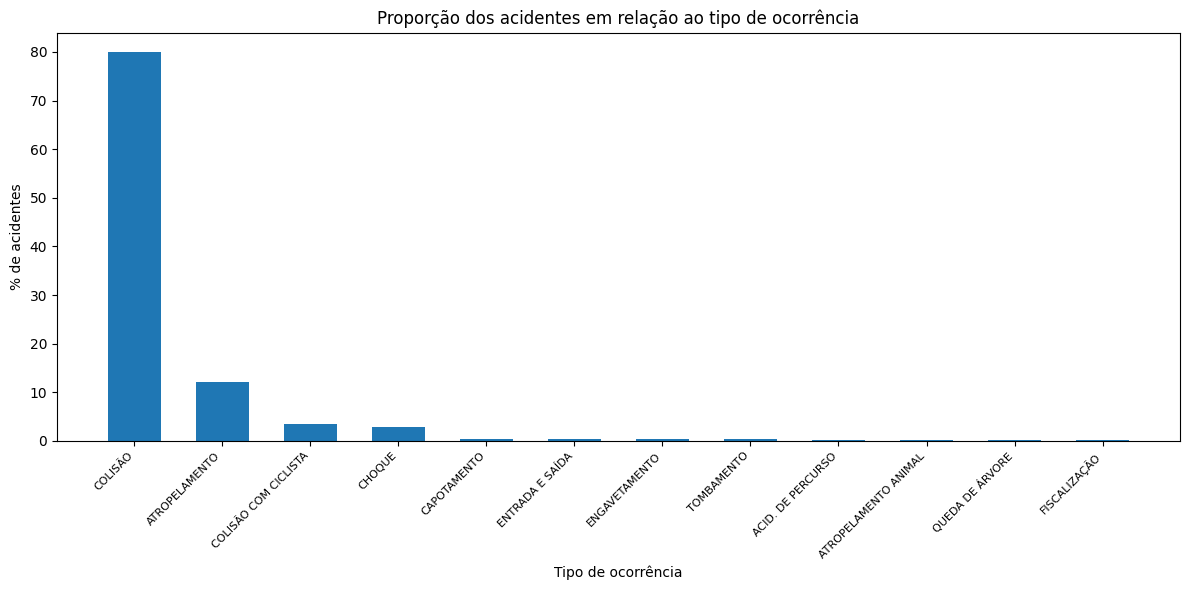

In [ ]:
# Aprimorando o gráfico de barras
x = df_acidentes["tipo de ocorrencia"].value_counts().index
y = df_acidentes["tipo de ocorrencia"].value_counts(normalize=True)*100

plt.figure(figsize=(12,6))
plt.bar(x, y, width = 0.6)

plt.xticks(rotation = 45, ha="right", fontsize = 8)

plt.title("Proporção dos acidentes em relação ao tipo de ocorrência")

plt.xlabel("Tipo de ocorrência")
plt.ylabel("% de acidentes")

plt.tight_layout()

plt.show()

### Step 7. Apresente um gráfico de pizza que mostre a porcentagem da proporção de acidentes por tipo de ocorrência apenas para os tipos de ocorrência que se repetiram 30 vezes ou mais. Na legenda deve estar o tipo de ocorrência. (Não se preocupar com textos sobrescritos)

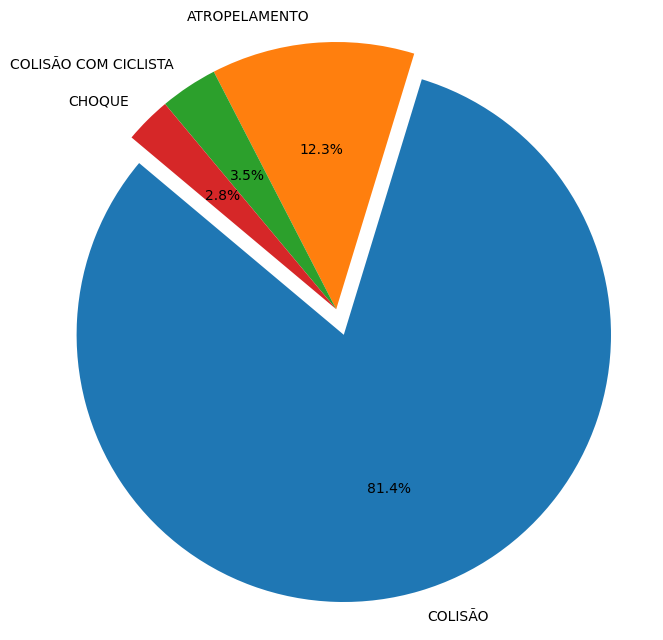

In [ ]:
df_acidentes_mais_30 = df_acidentes["tipo de ocorrencia"].value_counts()[df_acidentes["tipo de ocorrencia"].value_counts() >= 30]

df_lista = df_acidentes_mais_30.index
verifica = df_acidentes["tipo de ocorrencia"].isin(df_lista)

tupla_tamanho = (0,) * (df_acidentes[verifica]["tipo de ocorrencia"].value_counts().values.size - 1)
explode = (0.1, ) + tupla_tamanho

plt.figure(figsize=(8,8))

plt.pie(df_acidentes[verifica]["tipo de ocorrencia"].value_counts().values, labels=df_acidentes[verifica]["tipo de ocorrencia"].value_counts().index, autopct='%1.1f%%', explode=explode, startangle=140)

plt.axis('equal')

plt.show()

### Step 8. Apresente a distribuição da quantidade de vítimas analisando o tipo de veículo.
Antes disso, atenção: alguns valores podem estar errados tanto na coluna de vítimas quanto na coluna de tipos de veículo. Agrupe os valores do mesmo tipo de veículo, resultando em 6 tipos. Na coluna de vítimas, altere os valores que foram preenchidos errados por 0 (zero). Observe se as colunas estão preenchidas com as variáveis do tipo correto. (Para mudar o tipo de dados de uma coluna usa .astype())


In [ ]:
#tratando tipo
df_acidentes["tipo"] = df_acidentes["tipo"].str.replace("Automoveis","Automóvel")
df_acidentes["tipo"] = df_acidentes["tipo"].str.replace("Automóveis","Automóvel")

#tratando quantidade vitimas
df_acidentes["quantidade de vitimas"] = df_acidentes["quantidade de vitimas"].str.replace("'''",'0')
df_acidentes["quantidade de vitimas"] = df_acidentes["quantidade de vitimas"].str.replace("-",'0')
df_acidentes["quantidade de vitimas"] = df_acidentes["quantidade de vitimas"].str.replace("F",'0')
df_acidentes["quantidade de vitimas"] = df_acidentes["quantidade de vitimas"].str.replace("f",'0')

#tratamento do tipo de quantidade de vitimas
df_acidentes["quantidade de vitimas"] = df_acidentes["quantidade de vitimas"].astype('int64')

#group by

df_vitimas_por_tip_veiculo = df_acidentes.groupby('tipo')['quantidade de vitimas'].sum().sort_values(ascending=False)
df_vitimas_por_tip_veiculo

tipo
Motocicleta    882
Automóvel      226
Pedestre       164
Ciclista        63
Outros          49
Ciclomotor      26
Name: quantidade de vitimas, dtype: int64

### Step 9. Encontrado o tipo de veículo com o maior número de vítimas, apresente um gráfico de barras horizontal que mostre os TOP 5 bairros em que aconteceram acidentes com esse tipo de veículo

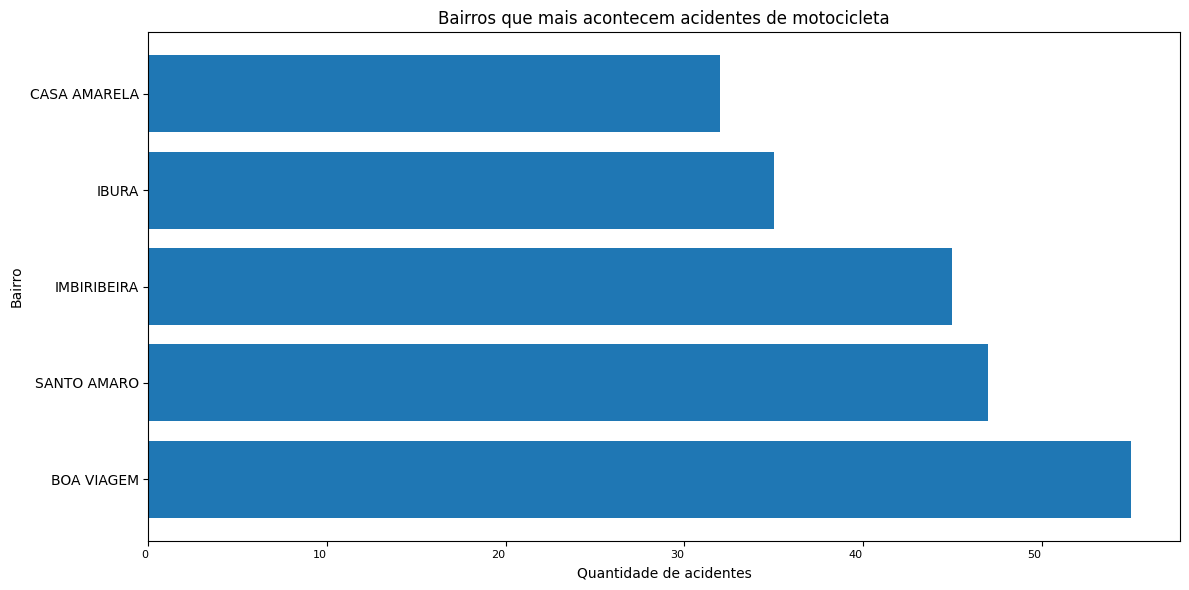

In [ ]:
veic_com_maior_num_vitimas = df_vitimas_por_tip_veiculo.idxmax()

filtered_df = df_acidentes[df_acidentes['tipo'] == veic_com_maior_num_vitimas]
top_5_bairros = filtered_df['bairro'].value_counts().head(5)

plt.figure(figsize=(12, 6))
plt.barh(top_5_bairros.head().index, top_5_bairros.head().values)

plt.xticks(ha='right', fontsize=8)

plt.title("Bairros que mais acontecem acidentes de motocicleta")
plt.xlabel("Quantidade de acidentes")
plt.ylabel("Bairro")

plt.tight_layout()
plt.show()

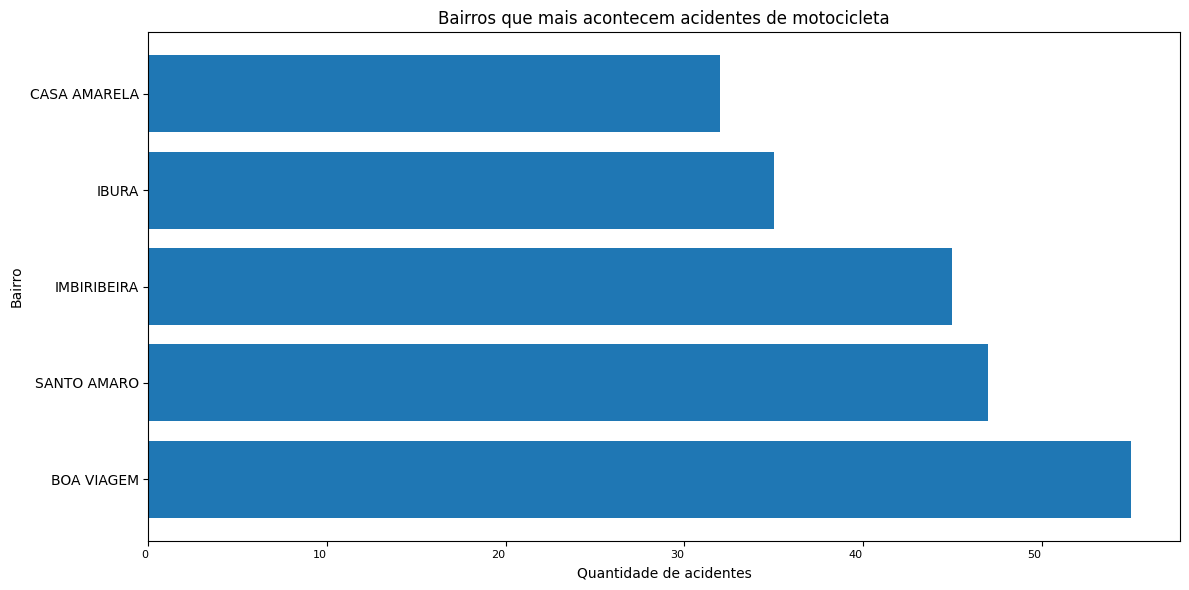

In [ ]:
# df com o maior numero de vitimas
df_veiculo_com_maior_vitimas = df_acidentes[df_acidentes['tipo'] == 'Motocicleta']

# df tipo de veiculo com maior numero de vitimas

df_tipo_veiculo_com_maior_vitimas = df_veiculo_com_maior_vitimas.groupby('bairro')['quantidade de vitimas'].size().sort_values(ascending=False)

df_tipo_veiculo_com_maior_vitimas.head()

plt.figure(figsize=(12, 6))
plt.barh(df_tipo_veiculo_com_maior_vitimas.head().index, df_tipo_veiculo_com_maior_vitimas.head().values)

plt.xticks(ha='right', fontsize=8)

plt.title("Bairros que mais acontecem acidentes de motocicleta")
plt.xlabel("Quantidade de acidentes")
plt.ylabel("Bairro")

plt.tight_layout()
plt.show()

### Step 10. Em qual mês teve mais vítimas? Quantas vítimas?
Atenção: Use pd.to_datetime para transformar uma coluna em formato data e use dt.month_name() para extrair o mês dessa coluna. É permitido criar novas colunas no dataframe.


In [ ]:
df_acidentes_novo = df_acidentes.copy()
df_acidentes_novo['mes'] = pd.to_datetime(df_acidentes_novo['data de abertura']).dt.month_name()

df_vitimas_por_mes = df_acidentes_novo.groupby('mes')['quantidade de vitimas'].sum().sort_values(ascending=False)
df_vitimas_por_mes.head()


<ipython-input-11-19dad0ac6f7c>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_acidentes_novo['mes'] = pd.to_datetime(df_acidentes_novo['data de abertura']).dt.month_name()


mes
July        197
June        179
April       173
January     161
February    159
Name: quantidade de vitimas, dtype: int64

### Step 11. Insira um gráfico de dispersão que apresente no eixo x os meses e no eixo y o número de vítimas

<ipython-input-12-4bd4c3e2c5be>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_acidentes_novo['numero_mes'] = pd.to_datetime(df_acidentes_novo['data de abertura']).dt.month


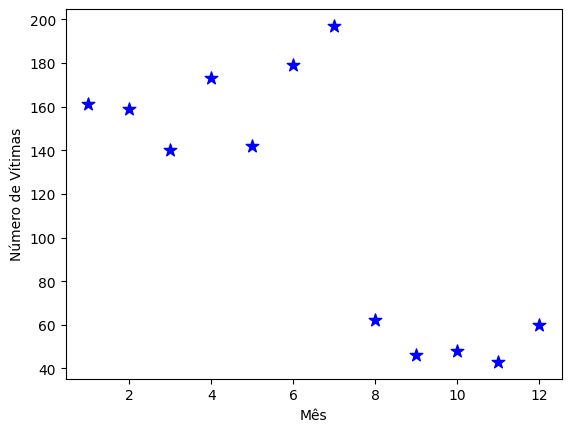

In [ ]:
df_acidentes_novo['numero_mes'] = pd.to_datetime(df_acidentes_novo['data de abertura']).dt.month

acidentes_por_mes = df_acidentes_novo.groupby('numero_mes')['quantidade de vitimas'].sum()

plt.figure()
plt.scatter(acidentes_por_mes.index, acidentes_por_mes.values,  label ="Pontos", marker = "*", color='b', s=90)
plt.xlabel('Mês')
plt.ylabel('Número de Vítimas')
plt.xticks([2,4,6,8,10,12])

plt.show()


### Step 12. Crie seu enunciado e seu gráfico.
Atenção: Deve ter manipulação de dados e plotagem de gráfico

## 12.1 Verifique gráficamente se ainda restam dados significativos a serem tratados e realize o tratamento necessário.


complemento              12
descricao                 9
bairro                    2
longitude                 0
latitude                  0
data de abertura          0
hora de abertura          0
endereco                  0
tipo de ocorrencia        0
quantidade de vitimas     0
tipo                      0
dtype: int64

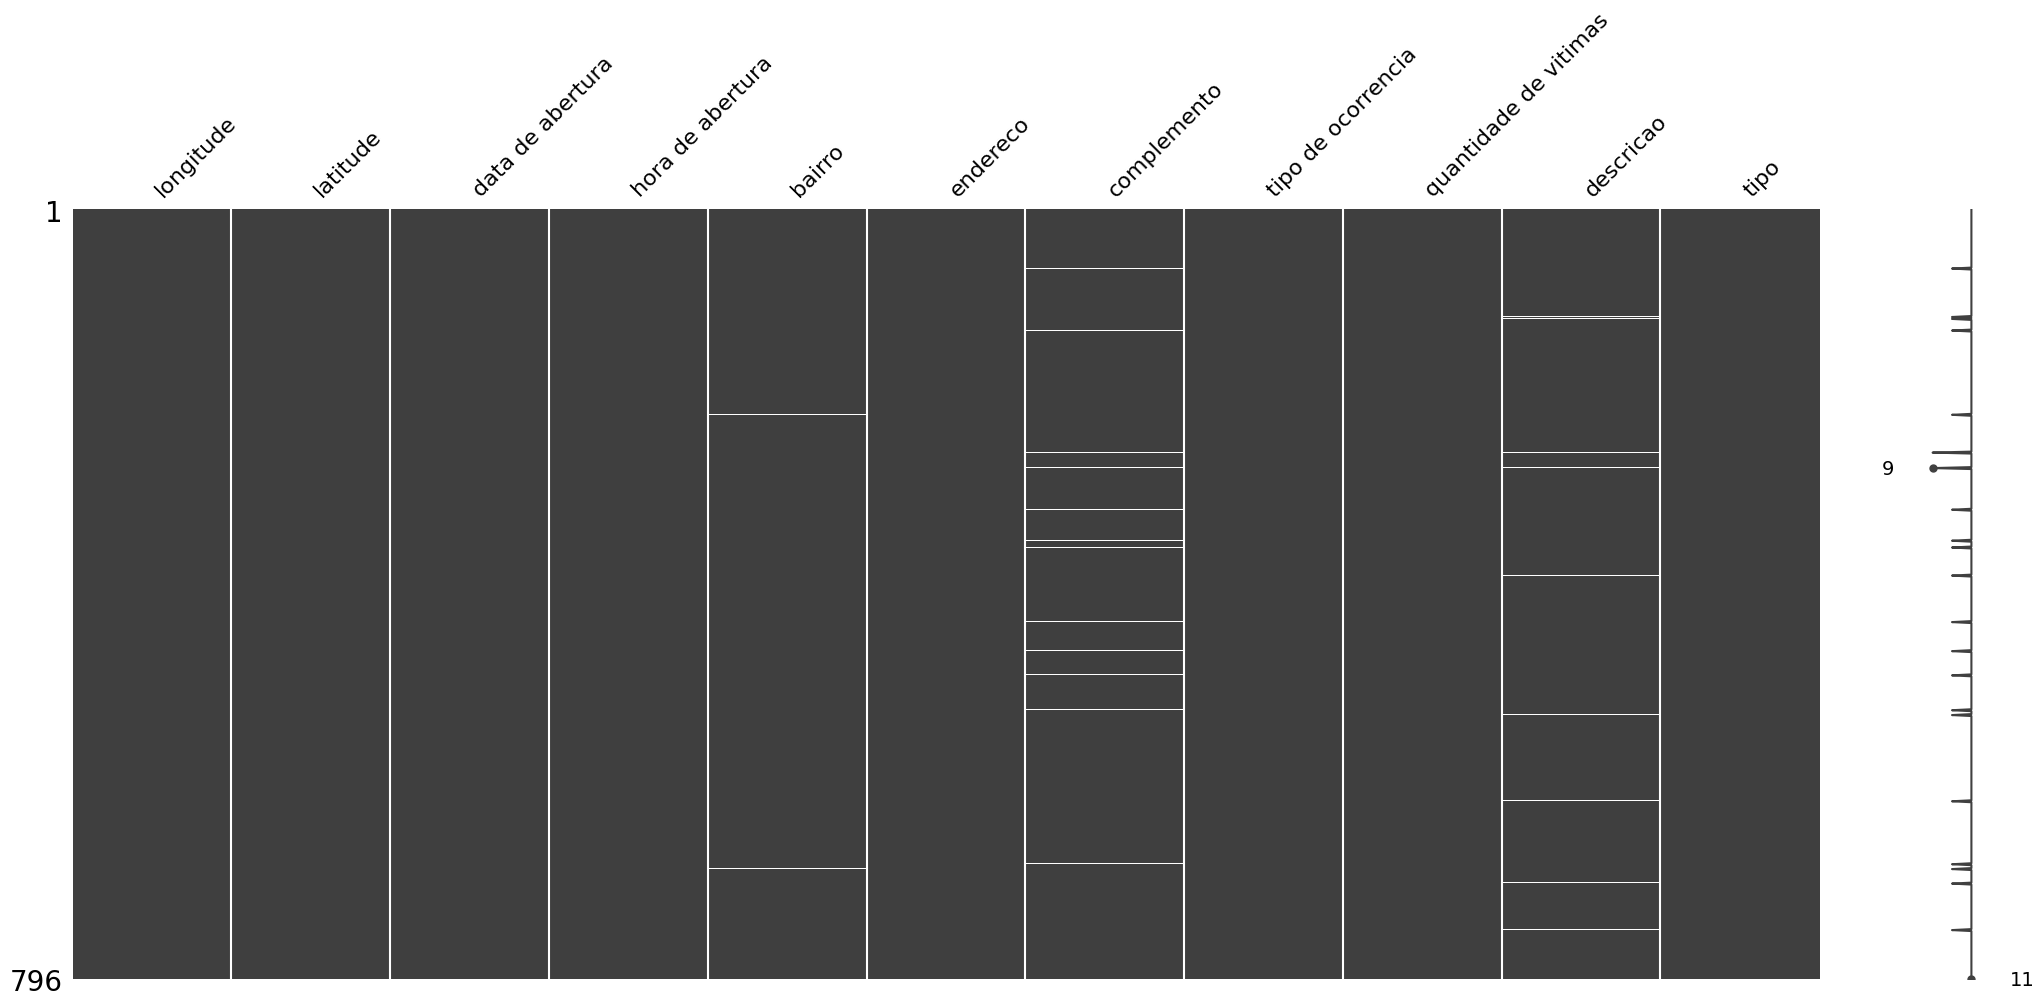

In [ ]:
import missingno as msno
# pegando o dataframe dos acidentes de motocicleta
msno.matrix(filtered_df)

filtered_df.isnull().sum().sort_values(ascending=False)

In [ ]:
# excluindo valores NA da série Bairro
df_acidentes = df_acidentes.dropna(subset='bairro')

<Axes: >

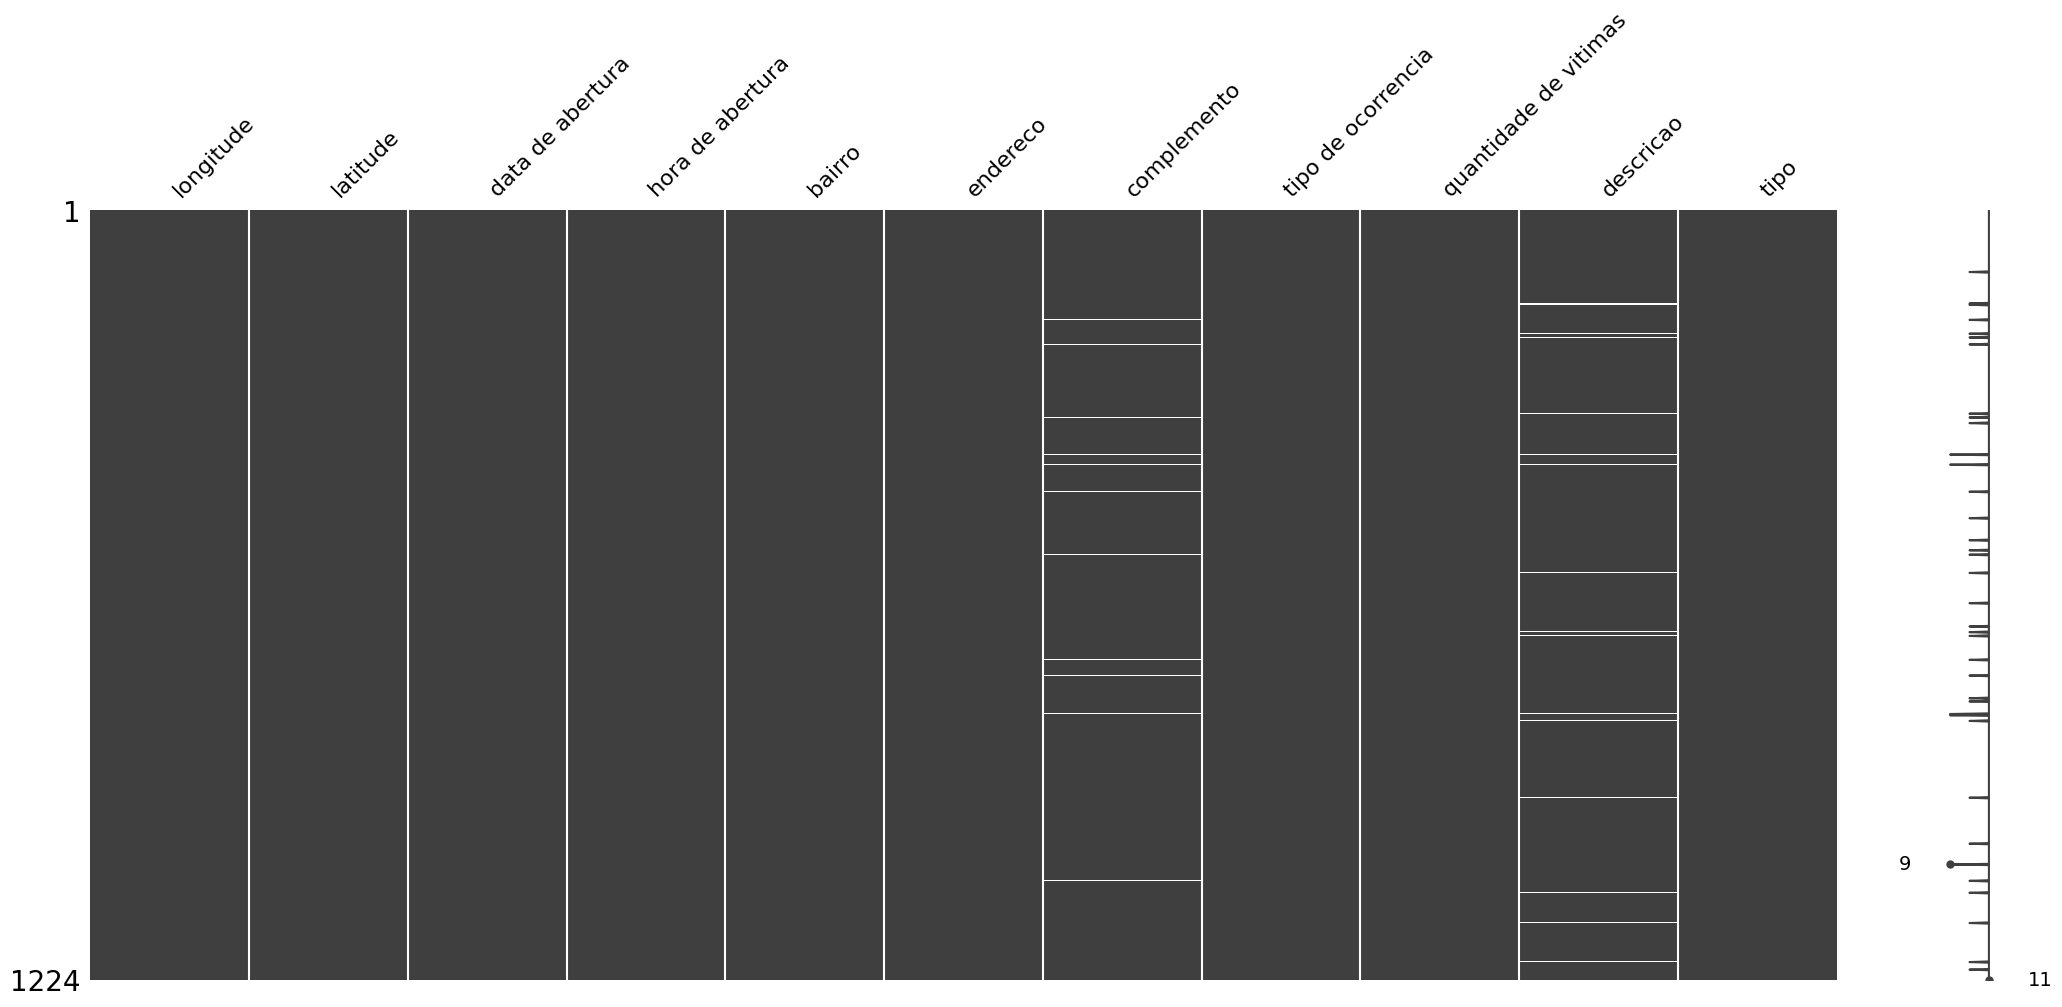

In [ ]:
# Verificando graficamente os dados NaN após o tratamento
msno.matrix(df_acidentes)

In [ ]:
# vendo os sets que contem valores NA com os valores
df_acidentes.isnull().sum().sort_values(ascending=False)

descricao                23
complemento              18
endereco                  1
longitude                 0
latitude                  0
data de abertura          0
hora de abertura          0
bairro                    0
tipo de ocorrencia        0
quantidade de vitimas     0
tipo                      0
dtype: int64

In [ ]:
# Tratamento de erros de nomenclarutra de bairros
df_acidentes["bairro"] = df_acidentes["bairro"].str.replace("BOAVISTA",'BOA VISTA')
df_acidentes["bairro"] = df_acidentes["bairro"].str.replace("BOAVIAGEM",'BOA VIAGEM')
df_acidentes["bairro"] = df_acidentes["bairro"].str.replace("CAMPOGRANDE",'CAMPO GRANDE')
df_acidentes["bairro"] = df_acidentes["bairro"].str.replace("CASAFORTE",'CASA FORTE')
df_acidentes["bairro"] = df_acidentes["bairro"].str.replace("DOISUNIDOS",'DOIS UNIDOS')
df_acidentes["bairro"] = df_acidentes["bairro"].str.replace("SANTOANTÔNIO",'SANTO ANTÔNIO')

df_acidentes['bairro'].sort_values().unique()

array(['AFLITOS', 'AFOGADOS', 'ALTO JOSÉ BONIFÁCIO', 'ALTO JOSÉ DO PINHO',
       'ALTO SANTA TERESINHA', 'APIPUCOS', 'AREIAS', 'ARRUDA',
       'BAIRRO DO RECIFE', 'BARRO', 'BEBERIBE', 'BOA VIAGEM', 'BOA VISTA',
       'BOMBA DO HEMETÉRIO', 'BONGI', 'BRASÍLIA TEIMOSA',
       'BREJO DE BEBERIBE', 'CABANGA', 'CAJUEIRO', 'CAMPINA DO BARRETO',
       'CAMPO GRANDE', 'CASA AMARELA', 'CASA FORTE', 'CAXANGÁ', 'CAÇOTE',
       'CIDADE UNIVERSITÁRIA', 'COELHOS', 'COQUEIRAL', 'CORDEIRO',
       'CURADO', 'DERBY', 'DOIS IRMÃOS', 'DOIS UNIDOS', 'ENCRUZILHADA',
       'ENGENHO DO MEIO', 'ESPINHEIRO', 'ESTÂNCIA', 'FUNDÃO', 'GRAÇAS',
       'GUABIRABA', 'HIPÓDROMO', 'IBURA', 'ILHA DO LEITE',
       'ILHA DO RETIRO', 'ILHA JOANA BEZERRA', 'IMBIRIBEIRA', 'IPSEP',
       'IPUTINGA', 'JAQUEIRA', 'JARDIM SÃO PAULO', 'JIQUIÁ',
       'JOANA BEZERRA', 'JORDÃO', 'LINHA DO TIRO', 'MACAXEIRA',
       'MADALENA', 'MANGABEIRA', 'MANGUEIRA', 'MUSTARDINHA',
       'NOVA DESCOBERTA', 'PAISSANDU', 'PARNAMIRIM', 'P

In [ ]:
# definindo os dataframes dos turnos: manhã, tarde, noite e madrugada
df_acidentes_manha = df_acidentes[(df_acidentes['hora de abertura'] >= '06:00') & (df_acidentes['hora de abertura'] < '12:00')].groupby('bairro').size().sort_values(ascending=False)
df_acidentes_tarde = df_acidentes[(df_acidentes['hora de abertura'] >= '12:00') & (df_acidentes['hora de abertura'] < '18:00')].groupby('bairro').size().sort_values(ascending=False)
df_acidentes_noite = df_acidentes[df_acidentes['hora de abertura'] >= '18'].groupby('bairro').size().sort_values(ascending=False)
df_acidentes_madrugada = df_acidentes[df_acidentes['hora de abertura'] < '06:00'].groupby('bairro').size().sort_values(ascending=False)

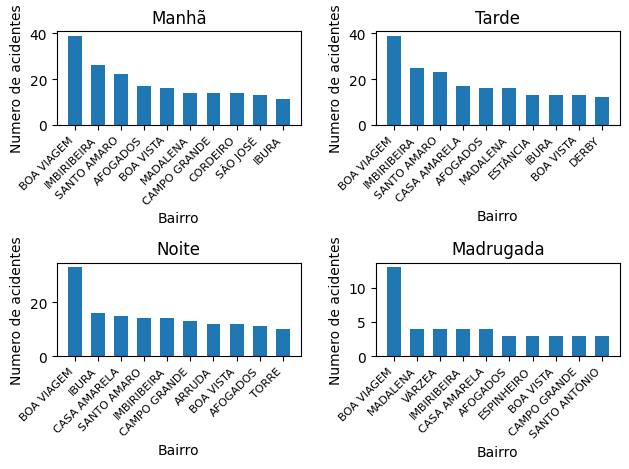

In [ ]:
#grafico manha
x1 = df_acidentes_manha.head(10).index
y1 = df_acidentes_manha.head(10).values
plt.subplot(2,2,1)
plt.bar(x1, y1, width = 0.6)
plt.xticks(rotation = 45, ha="right", fontsize = 8, )
plt.title("Manhã")
plt.xlabel("Bairro")
plt.ylabel("Numero de acidentes")


#grafico tarde
x2 = df_acidentes_tarde.head(10).index
y2 = df_acidentes_tarde.head(10).values
plt.subplot(2,2,2)
plt.bar(x2, y2, width = 0.6)
plt.xticks(rotation = 45, ha="right", fontsize = 8, )
plt.title("Tarde")
plt.xlabel("Bairro")
plt.ylabel("Numero de acidentes")


#grafico noite
x3 = df_acidentes_noite.head(10).index
y3 = df_acidentes_noite.head(10).values
plt.subplot(2,2,3)
plt.bar(x3, y3, width = 0.6)

plt.xticks(rotation = 45, ha="right", fontsize = 8, )
plt.title("Noite")
plt.xlabel("Bairro")
plt.ylabel("Numero de acidentes")

#grafico madrugada
x4 = df_acidentes_madrugada.head(10).index
y4 = df_acidentes_madrugada.head(10).values
plt.subplot(2,2,4)
plt.bar(x4, y4, width = 0.6)

plt.xticks(rotation = 45, ha="right", fontsize = 8, )
plt.title("Madrugada")
plt.xlabel("Bairro")
plt.ylabel("Numero de acidentes")
plt.tight_layout()

plt.show()


In [ ]:
df_acidentes_bv_manha = df_acidentes[(df_acidentes['bairro'] == 'BOA VIAGEM') & (df_acidentes['hora de abertura'] >='06') & (df_acidentes['hora de abertura'] < '12')].groupby('tipo').size().sort_values(ascending=False)
df_acidentes_bv_tarde = df_acidentes[(df_acidentes['bairro'] == 'BOA VIAGEM') & (df_acidentes['hora de abertura'] >='12') & (df_acidentes['hora de abertura'] < '18')].groupby('tipo').size().sort_values(ascending=False)
df_acidentes_bv_noite = df_acidentes[(df_acidentes['bairro'] == 'BOA VIAGEM') & (df_acidentes['hora de abertura'] >='18')].groupby('tipo').size().sort_values(ascending=False)
df_acidentes_bv_madrugada = df_acidentes[(df_acidentes['bairro'] == 'BOA VIAGEM') & (df_acidentes['hora de abertura'] < '06')].groupby('tipo').size().sort_values(ascending=False)
print('manhã \n', df_acidentes_bv_manha)

print('----------')
print('tarde \n', df_acidentes_bv_tarde)

print('----------')
print('noite \n', df_acidentes_bv_noite)
df_acidentes_bv_noite
print('----------')
print('madrugada \n', df_acidentes_bv_madrugada)

manhã 
 tipo
Motocicleta    18
Automóvel      15
Pedestre        4
Ciclomotor      1
Outros          1
dtype: int64
----------
tarde 
 tipo
Motocicleta    18
Automóvel      12
Pedestre        6
Ciclista        1
Ciclomotor      1
Outros          1
dtype: int64
----------
noite 
 tipo
Motocicleta    17
Automóvel       8
Pedestre        4
Ciclista        2
Ciclomotor      2
dtype: int64
----------
madrugada 
 tipo
Automóvel      10
Motocicleta     2
Ciclomotor      1
dtype: int64


# O que podemos inferir a partir dos graficos
*   O maior numero de acidentes acontece nos períodos da manhã e da tarde, diminuindo a quantidade na noite e na madrugada.
*   Boa viagem é o bairro que se destaca com o maior número de acidentes em todos os turnos.
* A partir de outra análise, vimos que em Boa viagem os tipos acidentes no turno da manha, tarde e noite estão distribuídos em quantidades semelhantes, porém na madrugada o maior numero de acidentes é o de carro, com bem menos acidentes de motocicleta.

